**Import necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score,precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier

**ERD**

In [2]:
df=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df['c_HeartDisease']=df['HeartDisease'].map({1:'heart disease',0:'Normal'})

In [10]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,c_HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Normal
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,heart disease
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Normal
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,heart disease
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,heart disease
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,heart disease
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,heart disease
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,heart disease


**Data visualization**

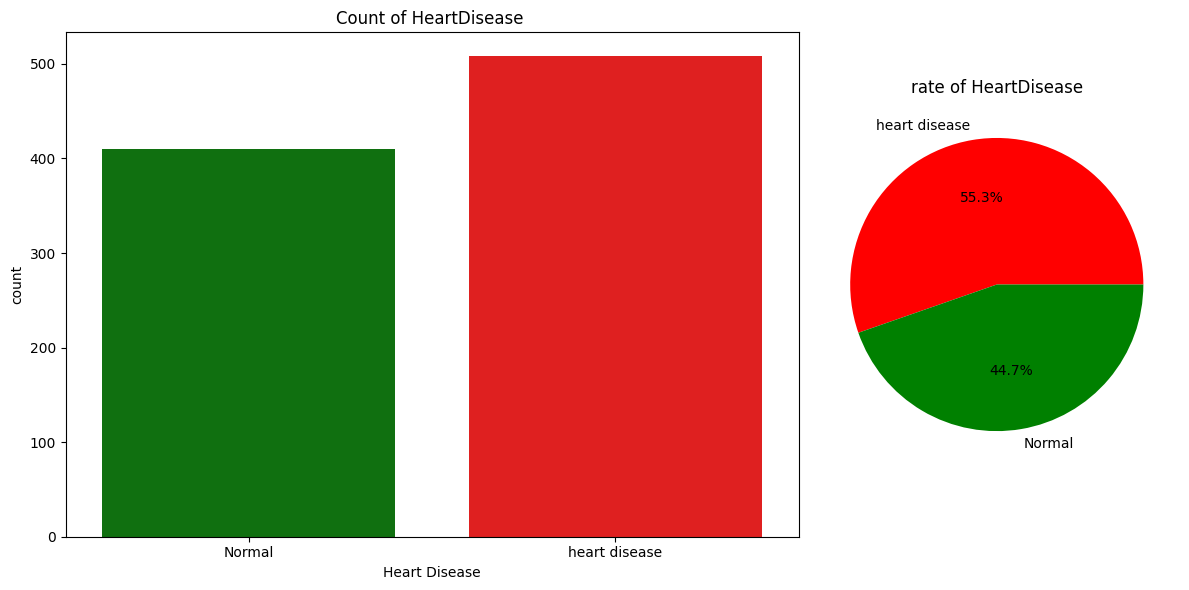

In [11]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot(x='c_HeartDisease', data=df, palette=[ 'green','red'],ax=ax1)
ax1.set_title('Count of HeartDisease ')
ax1.set_xlabel('Heart Disease')

ax2 = fig.add_subplot(gs[1])
types = df['c_HeartDisease'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%',colors=['red', 'green'])
ax2.set_title('rate of HeartDisease')

plt.tight_layout()
plt.show()

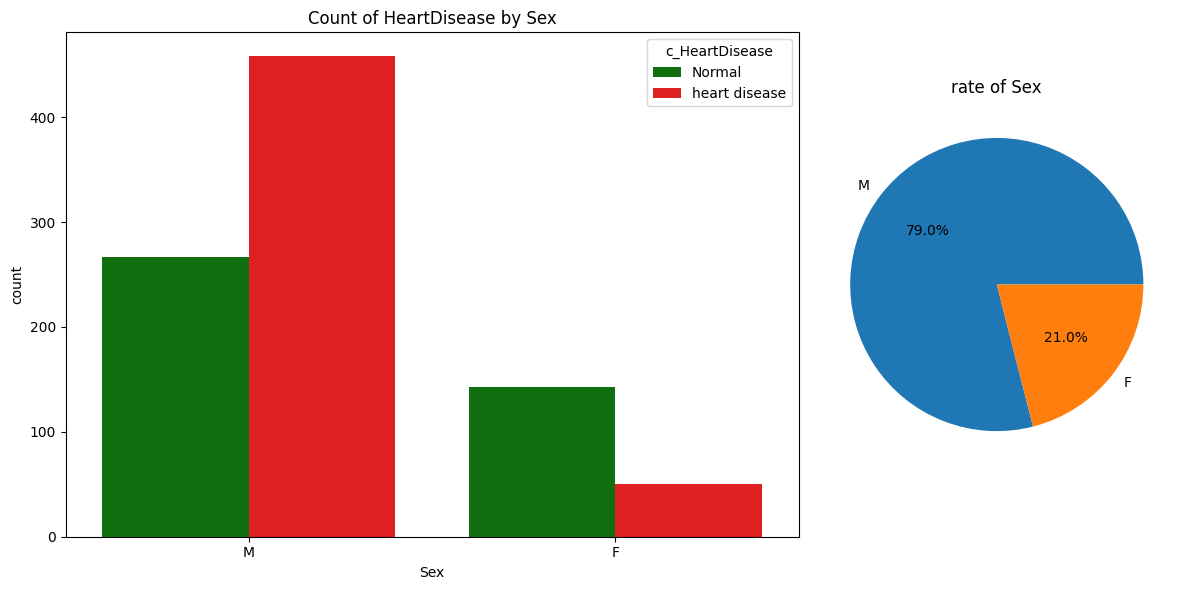

In [12]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot( x='Sex',hue='c_HeartDisease', data=df, palette=[ 'green','red'],ax=ax1)
ax1.set_title('Count of HeartDisease by Sex')
ax1.set_xlabel('Sex')

ax2 = fig.add_subplot(gs[1])
types = df['Sex'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('rate of Sex')

plt.tight_layout()
plt.show()

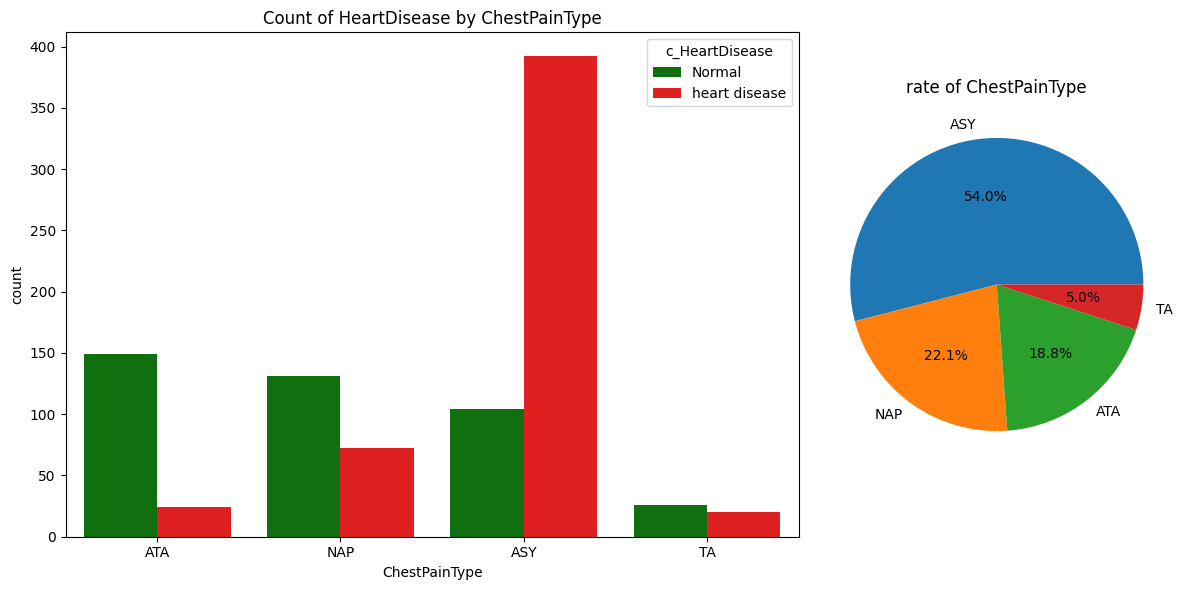

In [13]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot( x='ChestPainType',hue='c_HeartDisease', data=df, palette=[ 'green','red'],ax=ax1)
ax1.set_title('Count of HeartDisease by ChestPainType')


ax2 = fig.add_subplot(gs[1])
types = df['ChestPainType'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('rate of ChestPainType')

plt.tight_layout()
plt.show()

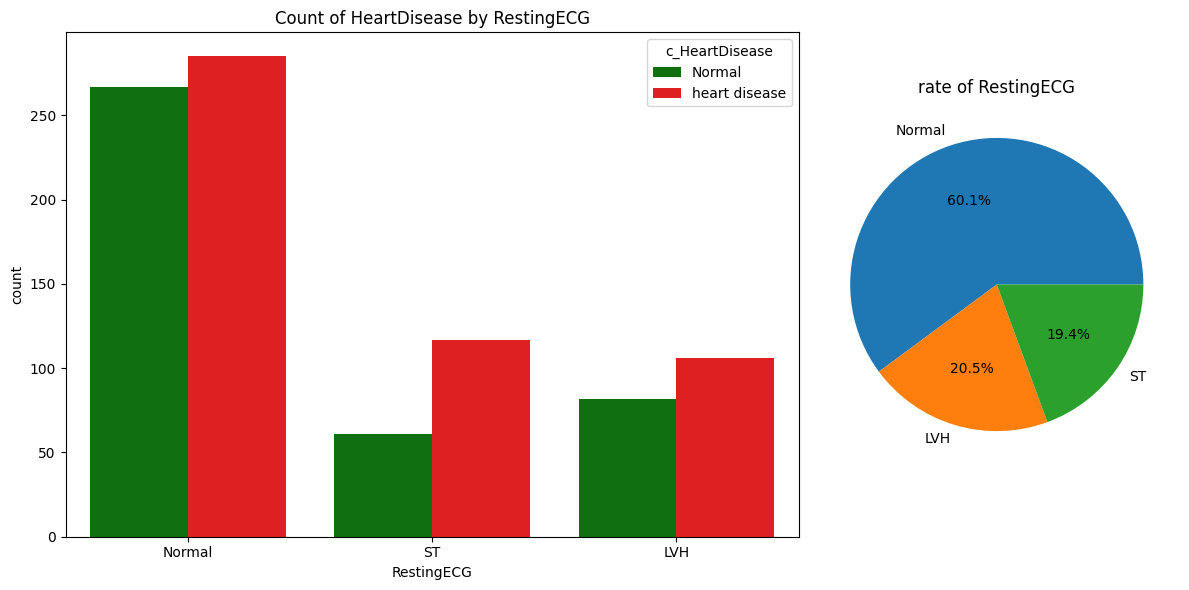

In [14]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot( x='RestingECG',hue='c_HeartDisease', data=df, palette=[ 'green','red'],ax=ax1)
ax1.set_title('Count of HeartDisease by RestingECG')


ax2 = fig.add_subplot(gs[1])
types = df['RestingECG'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('rate of RestingECG')

plt.tight_layout()
plt.show()

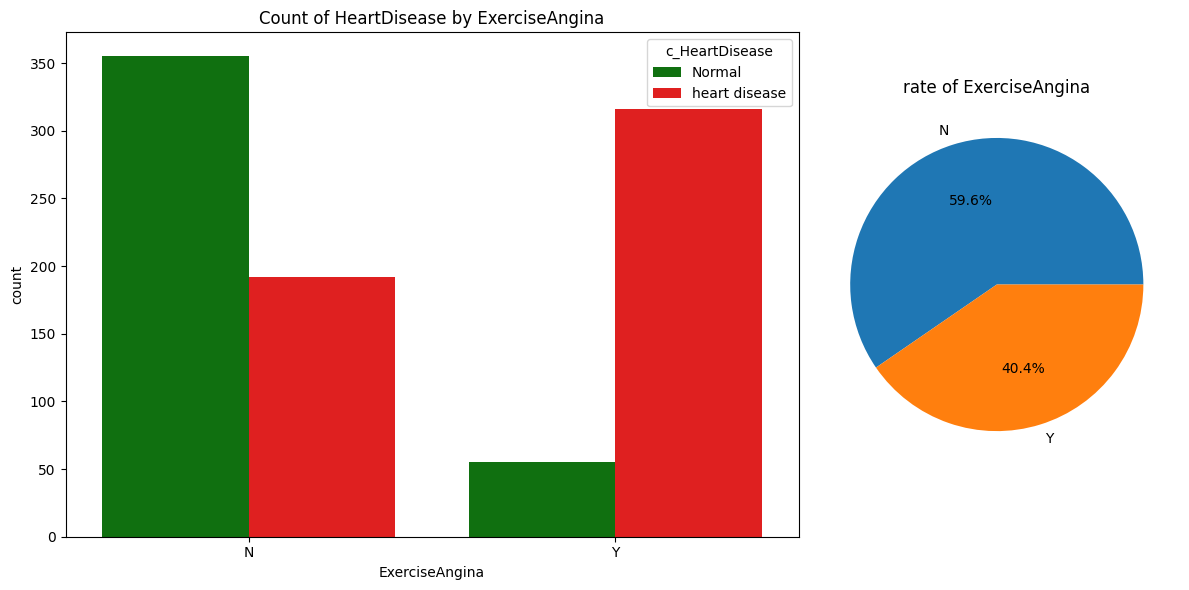

In [15]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot( x='ExerciseAngina',hue='c_HeartDisease', data=df, palette=[ 'green','red'],ax=ax1)
ax1.set_title('Count of HeartDisease by ExerciseAngina')


ax2 = fig.add_subplot(gs[1])
types = df['ExerciseAngina'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('rate of ExerciseAngina')

plt.tight_layout()
plt.show()

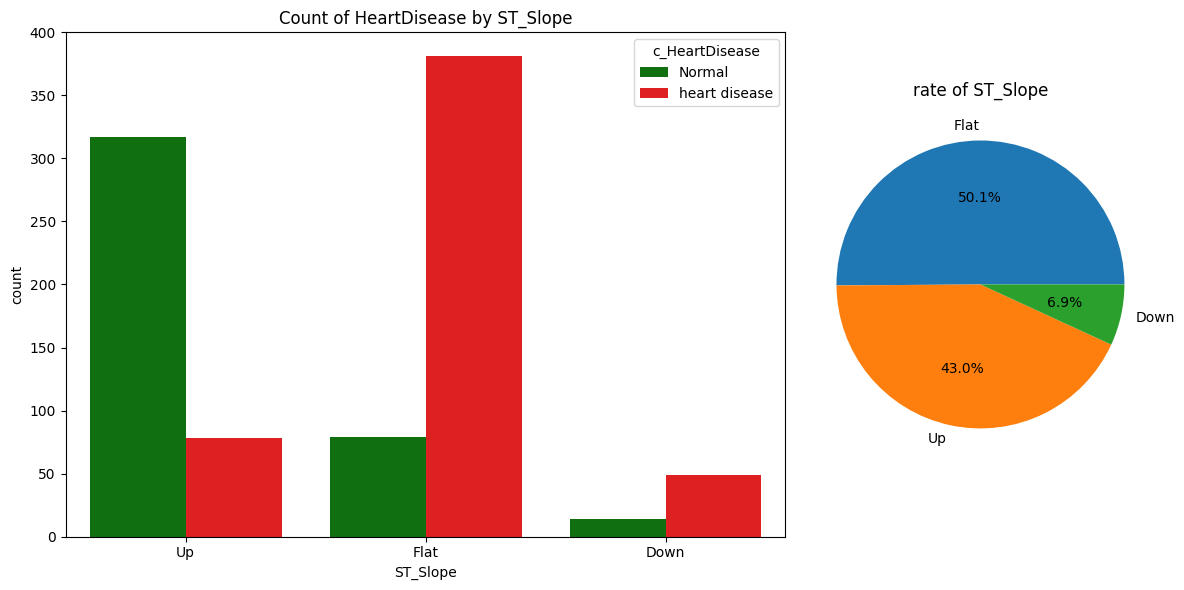

In [16]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0])
sns.countplot( x='ST_Slope',hue='c_HeartDisease', data=df, palette=[ 'green','red'],ax=ax1)
ax1.set_title('Count of HeartDisease by ST_Slope')


ax2 = fig.add_subplot(gs[1])
types = df['ST_Slope'].value_counts()
ax2.pie(types, labels=types.index, autopct='%1.1f%%')
ax2.set_title('rate of ST_Slope')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

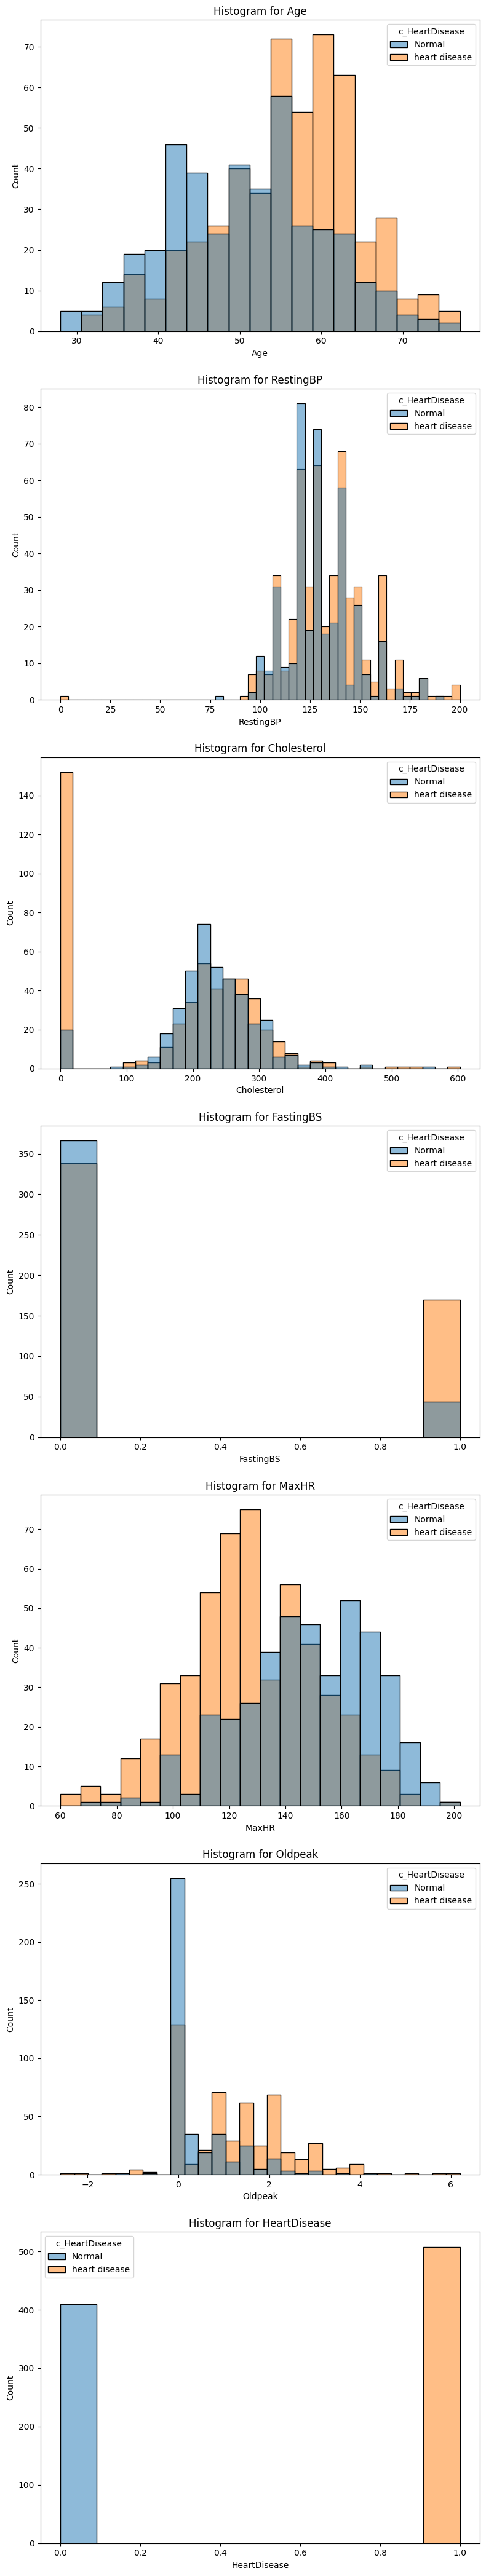

In [17]:
num_cols=df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(len(num_cols), 1, figsize=(8, 6 * len(num_cols)))
axes = axes.flatten()
for i, column in enumerate(df[num_cols]):
    sns.histplot(x=df[column], hue=df['c_HeartDisease'], ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)

plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

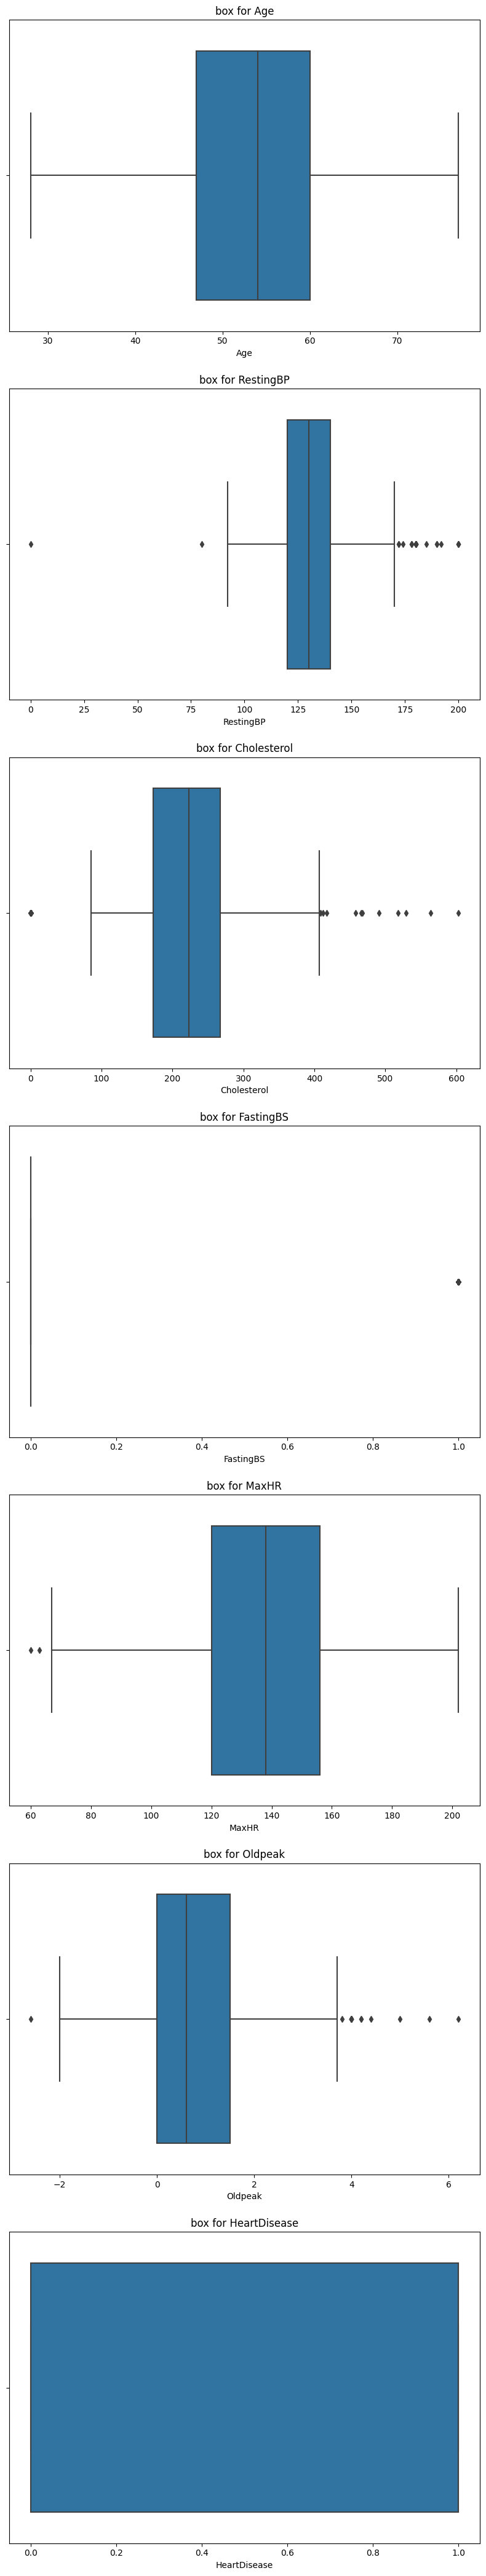

In [18]:
num_cols=df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(len(num_cols), 1, figsize=(8, 6 * len(num_cols)))
axes = axes.flatten()
for i, column in enumerate(df[num_cols]):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'box for {column}')
    axes[i].set_xlabel(column)

plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

**Handle outliers**

In [19]:
def handle_outliers(column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  low_bound = Q1 - 1.5*IQR
  high_bound = Q3 + 1.5*IQR
  df[column] = df[column].clip(lower = low_bound, upper = high_bound)

for column in num_cols:
  handle_outliers(column)

In [20]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,c_HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,Normal
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,heart disease
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0,Normal
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,heart disease
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1,heart disease
914,68,M,ASY,144,193.0,0,Normal,141,N,3.4,Flat,1,heart disease
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1,heart disease
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1,heart disease


In [21]:
df.drop('c_HeartDisease',axis=1,inplace=True)

In [22]:
cat_cols=df.select_dtypes(include=['object']).columns
cat_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

**Label Encoder**

In [23]:
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [24]:
df.corr().style.background_gradient(cmap='coolwarm').format("{:.1%}")

/opt/conda/lib/python3.10/site-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/conda/lib/python3.10/site-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,100.0%,5.6%,-7.7%,27.0%,-8.8%,nan%,-0.7%,-38.2%,21.6%,26.3%,-26.8%,28.2%
Sex,5.6%,100.0%,-12.7%,1.7%,-20.4%,nan%,7.2%,-18.9%,19.1%,11.2%,-15.1%,30.5%
ChestPainType,-7.7%,-12.7%,100.0%,-1.2%,6.1%,nan%,-7.3%,28.9%,-35.5%,-17.7%,21.4%,-38.7%
RestingBP,27.0%,1.7%,-1.2%,100.0%,10.7%,nan%,2.5%,-11.3%,15.5%,17.4%,-7.8%,11.3%
Cholesterol,-8.8%,-20.4%,6.1%,10.7%,100.0%,nan%,-19.6%,23.3%,-2.6%,5.4%,11.0%,-22.5%
FastingBS,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
RestingECG,-0.7%,7.2%,-7.3%,2.5%,-19.6%,nan%,100.0%,-17.9%,7.8%,-1.9%,-0.7%,5.7%
MaxHR,-38.2%,-18.9%,28.9%,-11.3%,23.3%,nan%,-17.9%,100.0%,-37.1%,-16.5%,34.4%,-40.1%
ExerciseAngina,21.6%,19.1%,-35.5%,15.5%,-2.6%,nan%,7.8%,-37.1%,100.0%,41.9%,-42.9%,49.4%
Oldpeak,26.3%,11.2%,-17.7%,17.4%,5.4%,nan%,-1.9%,-16.5%,41.9%,100.0%,-50.2%,41.0%


In [25]:
df.drop('RestingECG',axis=1,inplace=True)
df.drop('FastingBS',axis=1,inplace=True)

In [26]:
df.corr().style.background_gradient(cmap='coolwarm').format("{:.1%}")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,100.0%,5.6%,-7.7%,27.0%,-8.8%,-38.2%,21.6%,26.3%,-26.8%,28.2%
Sex,5.6%,100.0%,-12.7%,1.7%,-20.4%,-18.9%,19.1%,11.2%,-15.1%,30.5%
ChestPainType,-7.7%,-12.7%,100.0%,-1.2%,6.1%,28.9%,-35.5%,-17.7%,21.4%,-38.7%
RestingBP,27.0%,1.7%,-1.2%,100.0%,10.7%,-11.3%,15.5%,17.4%,-7.8%,11.3%
Cholesterol,-8.8%,-20.4%,6.1%,10.7%,100.0%,23.3%,-2.6%,5.4%,11.0%,-22.5%
MaxHR,-38.2%,-18.9%,28.9%,-11.3%,23.3%,100.0%,-37.1%,-16.5%,34.4%,-40.1%
ExerciseAngina,21.6%,19.1%,-35.5%,15.5%,-2.6%,-37.1%,100.0%,41.9%,-42.9%,49.4%
Oldpeak,26.3%,11.2%,-17.7%,17.4%,5.4%,-16.5%,41.9%,100.0%,-50.2%,41.0%
ST_Slope,-26.8%,-15.1%,21.4%,-7.8%,11.0%,34.4%,-42.9%,-50.2%,100.0%,-55.9%
HeartDisease,28.2%,30.5%,-38.7%,11.3%,-22.5%,-40.1%,49.4%,41.0%,-55.9%,100.0%


In [27]:
df.duplicated().sum()

1

In [28]:
df.drop_duplicates(inplace=True)

**Data normalization**

In [29]:
scaler = MinMaxScaler()
df= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1.0,0.333333,0.625,0.683667,0.779412,0.0,0.375000,1.0,0.0
1,0.428571,0.0,0.666667,0.875,0.393000,0.661765,0.0,0.541667,0.5,1.0
2,0.183673,1.0,0.333333,0.500,0.667667,0.235294,0.0,0.375000,1.0,0.0
3,0.408163,0.0,0.000000,0.600,0.483667,0.308824,1.0,0.625000,0.5,1.0
4,0.530612,1.0,0.666667,0.750,0.433000,0.411765,0.0,0.375000,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
912,0.346939,1.0,1.000000,0.250,0.617000,0.485294,0.0,0.575000,0.5,1.0
913,0.816327,1.0,0.000000,0.675,0.427667,0.551471,0.0,0.941667,0.5,1.0
914,0.591837,1.0,0.000000,0.500,0.262333,0.360294,1.0,0.575000,0.5,1.0
915,0.591837,0.0,0.333333,0.500,0.542333,0.794118,0.0,0.375000,0.5,1.0


In [30]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [31]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,1.0,0.333333,0.625,0.683667,0.779412,0.0,0.375000,1.0
1,0.428571,0.0,0.666667,0.875,0.393000,0.661765,0.0,0.541667,0.5
2,0.183673,1.0,0.333333,0.500,0.667667,0.235294,0.0,0.375000,1.0
3,0.408163,0.0,0.000000,0.600,0.483667,0.308824,1.0,0.625000,0.5
4,0.530612,1.0,0.666667,0.750,0.433000,0.411765,0.0,0.375000,1.0
...,...,...,...,...,...,...,...,...,...
912,0.346939,1.0,1.000000,0.250,0.617000,0.485294,0.0,0.575000,0.5
913,0.816327,1.0,0.000000,0.675,0.427667,0.551471,0.0,0.941667,0.5
914,0.591837,1.0,0.000000,0.500,0.262333,0.360294,1.0,0.575000,0.5
915,0.591837,0.0,0.333333,0.500,0.542333,0.794118,0.0,0.375000,0.5


In [32]:
y

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
912    1.0
913    1.0
914    1.0
915    1.0
916    0.0
Name: HeartDisease, Length: 917, dtype: float64

**Splitting the data into test and train**

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(733, 9)
(184, 9)
(733,)
(184,)


**Logistic Regression**

In [52]:
lr=LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [53]:
ypred1_test=lr.predict(x_test)
accuracy1_test = accuracy_score(y_test, ypred1_test)
print(f"Accuracy test: {round(accuracy1_test * 100,2)}%")

ypred1_train=lr.predict(x_train)
accuracy1_train = accuracy_score(y_train, ypred1_train)
print(f"Accuracy train: {round(accuracy1_train * 100,2)}%")

Accuracy test: 84.24%
Accuracy train: 85.13%


In [54]:
print("Classification Report:")
print(classification_report(y_test, ypred1_test))
pecision1=precision_score(y_test,ypred1_test)
Recall1=recall_score(y_test,ypred1_test)
Fscore1=f1_score(y_test,ypred1_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82        74
         1.0       0.91      0.82      0.86       110

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



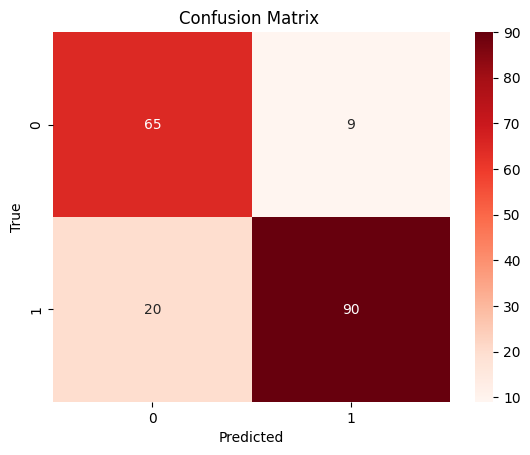

In [55]:
conf_matrix = confusion_matrix(y_test, ypred1_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

**RidgeClassifier**

In [56]:
knn = RidgeClassifier()
knn.fit(x_train,y_train)

RidgeClassifier()

In [67]:
ypred2_test=knn.predict(x_test)
accuracy2_test = accuracy_score(y_test, ypred2_test)
print(f"Accuracy test: {round(accuracy2_test * 100,6)}%")

ypred2_train=knn.predict(x_train)
accuracy2_train = accuracy_score(y_train, ypred2_train)
print(f"Accuracy train: {round(accuracy2_train * 100,6)}%")

Accuracy test: 84.23913%
Accuracy train: 84.447476%


In [58]:
print("Classification Report:")
print(classification_report(y_test, ypred2_test))
pecision2=precision_score(y_test,ypred2_test)
Recall2=recall_score(y_test,ypred2_test)
Fscore2=f1_score(y_test,ypred2_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.88      0.82        74
         1.0       0.91      0.82      0.86       110

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



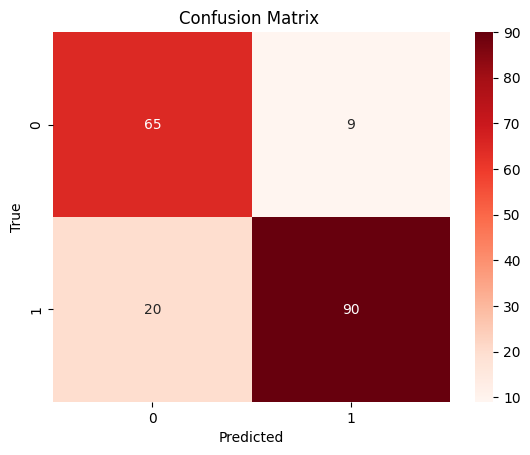

In [59]:
conf_matrix = confusion_matrix(y_test, ypred2_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

**SGDClassifier**

In [60]:
dt = SGDClassifier()
dt.fit(x_train, y_train)

SGDClassifier()

In [66]:
ypred3_test = dt.predict(x_test)

accuracy3_test = accuracy_score(y_test, ypred3_test)
print(f"Test Accuracy: {round(accuracy3_test * 100, 6)}%")

ypred3_train = dt.predict(x_train)

accuracy3_train = accuracy_score(y_train, ypred3_train)
print(f"Train Accuracy: {round(accuracy3_train * 100, 6)}%")

Test Accuracy: 69.021739%
Train Accuracy: 79.809004%


In [62]:
print("Classification Report:")
print(classification_report(y_test, ypred3_test))
pecision3=precision_score(y_test,ypred3_test)
Recall3=recall_score(y_test,ypred3_test)
Fscore3=f1_score(y_test,ypred3_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.57      0.89      0.70        74
         1.0       0.88      0.55      0.68       110

    accuracy                           0.69       184
   macro avg       0.73      0.72      0.69       184
weighted avg       0.76      0.69      0.69       184



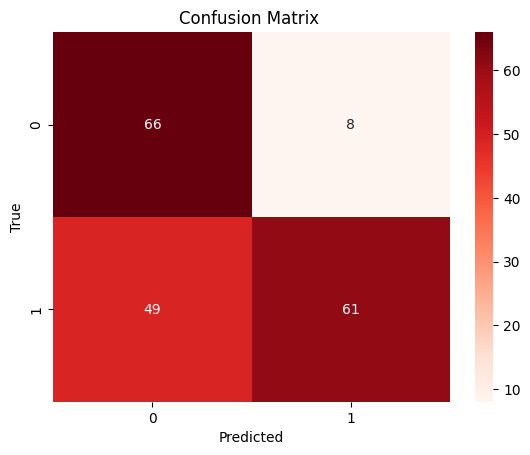

In [63]:
conf_matrix = confusion_matrix(y_test, ypred3_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()